In [1]:
## genenrate bounding box using google genai

In [1]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
load_env_file('./env');

In [3]:
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))

In [4]:
res =generate_bounding_box(model,image_path="/home/malav/Downloads/boilled_eggs.jpeg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [5]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [299, 59, 844, 880]}


In [6]:
img_bb,value = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=res,label="container",box_resize=True,show=False)

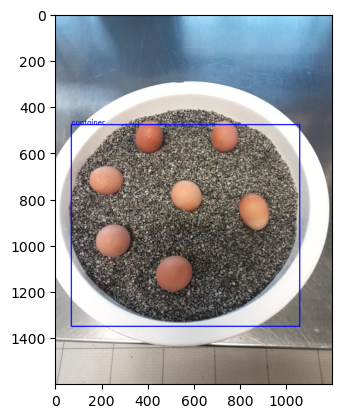

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()

In [8]:
## Getting mask 

In [9]:
from mb_annotation.sam2 import get_mask


/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [10]:
mask_img,mask_bbox = get_mask(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bbox_value=value,sam2_checkpoint='/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt',model_cfg='./sam2_hiera_s.yaml',show_final=False)


Getting mask
Getting final mask


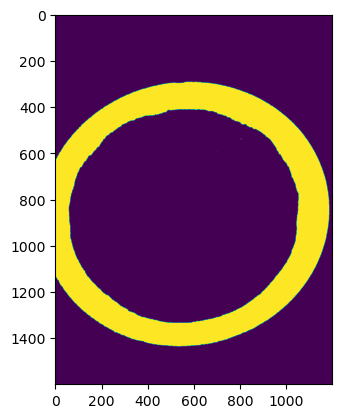

In [13]:
plt.imshow(mask_img)
plt.show()

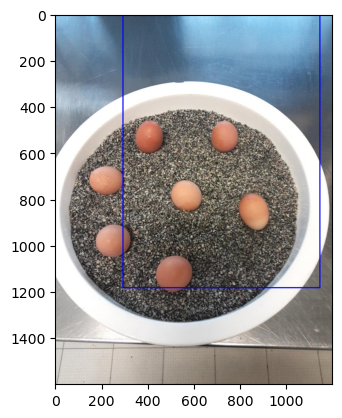

In [14]:
img_bb2,value2 = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=mask_bbox,label="container",box_resize=False,show=False)
plt.imshow(img_bb2)
plt.show()


In [15]:
mask_bbox

[0.0, 293.0, 1183.0, 1143.0]

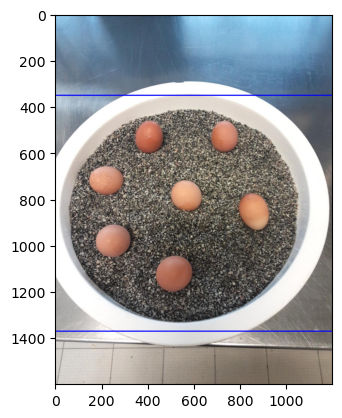

In [17]:
import cv2
img = cv2.imread("/home/malav/Downloads/boilled_eggs.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, (int(mask_bbox[0]),int(mask_bbox[1])), (int(mask_bbox[2]),int(mask_bbox[3])), (0, 0, 255), 4)
cv2.putText(img, "container", (int(mask_bbox[1]),int(mask_bbox[0])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.imshow(img)
plt.show()